In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [28]:
income_df = pd.read_csv('/home/student/IngajiDemo/dataset.csv')

In [5]:
# print(income_df.isna().sum())

In [29]:
income_df['Household_Head_Occupation'] = income_df.groupby('Household_Head_Highest_Grade_Completed')['Household_Head_Occupation'].transform(lambda x: x.ffill().bfill())

In [8]:
# print(income_df.isna().sum())

In [30]:
income_df['Household_Head_Class_of_Worker'] = income_df.groupby('Household_Head_Occupation')['Household_Head_Class_of_Worker'].transform(lambda x: x.ffill().bfill())

In [11]:
# print(income_df.isna().sum())

In [31]:
income_df['Total_Number_of_Family_members'] = income_df.groupby('Type_of_Household')['Total_Number_of_Family_members'].transform(lambda x: x.ffill().bfill())

In [14]:
# print(income_df.isna().sum())

In [32]:
income_df['Toilet_Facilities'] = income_df.groupby('Total_Number_of_Family_members')['Toilet_Facilities'].transform(lambda x: x.ffill().bfill())

In [17]:
# print(income_df.isna().sum())

In [33]:
income_df.rename(columns={'Total_Food_Expenditure': 'total_food_expenditure', 
                          'Bread_and_Cereals_Expenditure': 'bread_and_cereals_expenditure',
                          'Total_Rice_Expenditure': 'total_rice_expenditure',
                          'Meat_Expenditure': 'meat_expenditure',
                          'Total_Fish_and__marine_products_Expenditure': 'total_fish_and_marine_products_expenditure',
                          'Fruit_Expenditure': 'fruit_expenditure',
                          'Vegetables_Expenditure': 'vegetables_expenditure',
                          'Restaurant_and_hotels_Expenditure': 'restaurant_and_hotels_expenditure',
                          'Alcoholic_Beverages_Expenditure': 'alcoholic_beverages_expenditure',
                          'Tobacco_Expenditure': 'tobacco_expenditure',
                          'Clothing,_Footwear_and_Other_Wear_Expenditure': 'clothing_footwear_and_other_wear_expenditure',
                          'Housing_and_water_Expenditure': 'housing_and_water_expenditure',
                          'Medical_Care_Expenditure': 'medical_care_expenditure',
                          'Transportation_Expenditure': 'transportation_expenditure',
                          'Communication_Expenditure': 'communication_expenditure',
                          'Education_Expenditure': 'education_expenditure',
                          'Miscellaneous_Goods_and_Services_Expenditure': 'miscellaneous_goods_and_services_expenditure',
                          'Special_Occasions_Expenditure': 'special_occasions_expenditure',
                          'Main_Source_of_Income': 'main_source_of_income',
                          'Household_Head_Highest_Grade_Completed': 'household_head_highest_grade_completed',
                          'Household_Head_Occupation': 'household_head_occupation',
                          'Tenure_Status': 'tenure_status',
                          'Type_of_Building/House': 'type_of_building/house',
                          'Type_of_Household': 'type_of_household',
                          'Household_Head_Class_of_Worker': 'household_head_class_of_worker',
                          'Total_Household_Income': 'total_household_income',
                          'Total_Expenditures': 'total_expenditures',
                          'Crop_Farming_and_Gardening_expenses': 'crop_farming_and_gardening_expenses'
                         }, inplace=True)

In [34]:
# This are filtered columns for farmers occupations only 
farmer_occupations = [
    'Farmers', 'Agricultural laborers', 'Rice farmers', 'Crop Farming and Gardening',
    'Livestock farmers', 'Agricultural technicians', 'Farmhands and laborers', 'Hog raising farmers'
    ]

In [35]:
farmers_df = income_df[income_df['household_head_occupation'].isin(farmer_occupations)]

In [23]:
# farmers_df.head(20)

In [36]:
expenditure_columns = [
    'total_food_expenditure', 'bread_and_cereals_expenditure', 'total_rice_expenditure',
    'meat_expenditure', 'total_fish_and_marine_products_expenditure', 'fruit_expenditure',
    'vegetables_expenditure', 'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure',
    'tobacco_expenditure', 'clothing_footwear_and_other_wear_expenditure',
    'housing_and_water_expenditure', 'medical_care_expenditure', 'transportation_expenditure',
    'communication_expenditure', 'education_expenditure', 'miscellaneous_goods_and_services_expenditure',
    'special_occasions_expenditure', 'crop_farming_and_gardening_expenses'
]

In [37]:
categorical_columns=[
    'main_source_of_income', 'household_head_highest_grade_completed', 'household_head_occupation', 'tenure_status',
    'type_of_building/house', 'type_of_household', 'household_head_class_of_worker'
]

numerical_columns = [
    'total_household_income', 'total_expenditures', 'remaining_income'
]

In [50]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    income_df[col] = le.fit_transform(income_df[col])
    label_encoders[col] = le  # Store the label encoder if needed later

In [40]:
# Calculate Total Expenditures
farmers_df['total_expenditures'] = farmers_df[expenditure_columns].sum(axis=1)

# Calculate Remaining Income
farmers_df['remaining_income'] = farmers_df['total_household_income'] - farmers_df['total_expenditures']

# Display the updated DataFrame with remaining income
print(farmers_df[['total_household_income', 'total_expenditures', 'remaining_income']].head())

   total_household_income  total_expenditures  remaining_income
2                   82785              178294            -95509
3                  107589              223671           -116082
6                  198621              365287           -166666
7                  134961              318027           -183066
9                  625753              460995            164758


In [52]:
def determine_credit_score_and_loan(remaining_income):
    if remaining_income < 0:
        return 0, "No loan"
    elif remaining_income < 10000:
        return 25, "Up to 5,000"
    elif remaining_income < 20000:
        return 50, "Up to 15,000"
    elif remaining_income < 30000:
        return 75, "Up to 25,000"
    else:
        return 100, "Up to 50,000 or more"

In [41]:
for col in categorical_columns:
    le = LabelEncoder()
    farmers_df[col] = le.fit_transform(farmers_df[col])

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(farmers_df[numerical_columns])

In [45]:
print(f"Original number of features: {scaled_data.shape[1]}")
print(f"Reduced number of features: {pca_result.shape[1]}")

Original number of features: 3
Reduced number of features: 2


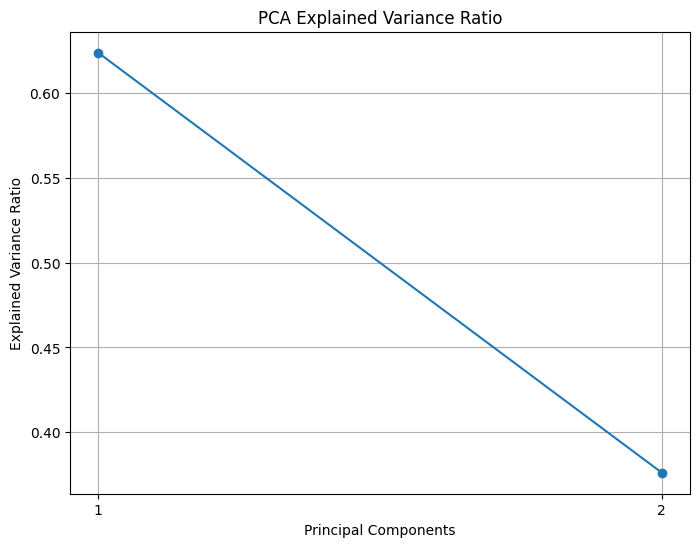

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, marker='o')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

In [48]:
print(farmers_df.columns)

Index(['total_household_income', 'Region', 'total_food_expenditure',
       'main_source_of_income', 'Agricultural_Household_indicator',
       'bread_and_cereals_expenditure', 'total_rice_expenditure',
       'meat_expenditure', 'total_fish_and_marine_products_expenditure',
       'fruit_expenditure', 'vegetables_expenditure',
       'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure',
       'tobacco_expenditure', 'clothing_footwear_and_other_wear_expenditure',
       'housing_and_water_expenditure', 'Imputed_House_Rental_Value',
       'medical_care_expenditure', 'transportation_expenditure',
       'communication_expenditure', 'education_expenditure',
       'miscellaneous_goods_and_services_expenditure',
       'special_occasions_expenditure', 'crop_farming_and_gardening_expenses',
       'Total_Income_from_Entrepreneurial_Acitivites', 'Household_Head_Sex',
       'Household_Head_Age', 'Household_Head_Marital_Status',
       'household_head_highest_grade_complet